In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
audio_path = 'C:/Users/gulce/codit_use_case/0_dB_pump/normal/normal/00000000.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [3]:
x, sr

(array([-0.00828569, -0.00836229, -0.00613663, ..., -0.00380668,
        -0.00376435, -0.00208453], dtype=float32),
 22050)

In [4]:
import IPython.display as ipd
ipd.Audio(audio_path)

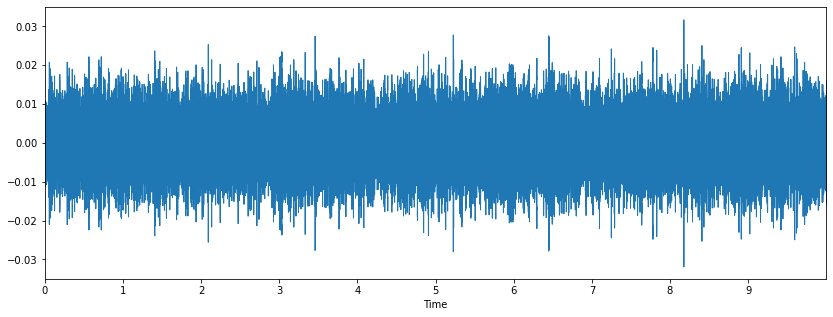

In [5]:
#display waveform
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

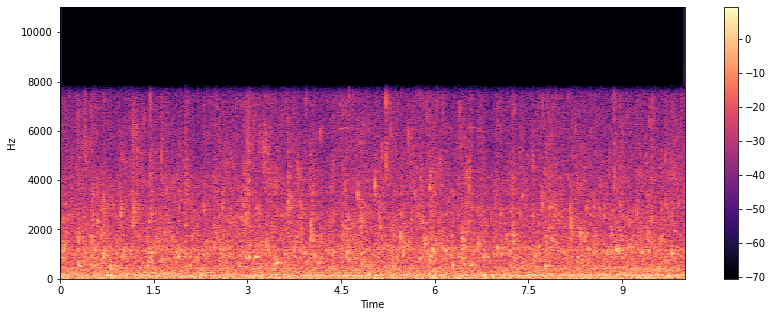

In [6]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [14]:
X

array([[ 8.1294721e-01+0.00000000e+00j,  4.2100930e-01+0.00000000e+00j,
         5.1782340e-02+0.00000000e+00j, ...,
         9.3595207e-02+0.00000000e+00j, -4.0733907e-03+0.00000000e+00j,
         3.7264803e-01+0.00000000e+00j],
       [-6.4914191e-01-5.33427469e-17j, -1.1415637e-01-3.85631144e-01j,
         1.2489058e-02+2.15624627e-02j, ...,
        -8.2055144e-02-1.49810286e-02j,  4.4636629e-03-1.03651203e-01j,
        -8.1991993e-02+4.95940834e-01j],
       [ 4.4922784e-01-1.37321635e-17j, -1.0969642e-01+1.56116009e-01j,
        -7.2307996e-02-2.12248042e-01j, ...,
        -4.5323838e-02+2.90447682e-01j,  3.4240577e-01+7.77677000e-02j,
        -5.4926521e-01-6.93176150e-01j],
       ...,
       [ 1.9737424e-03+5.92590785e-18j, -9.8684942e-04+3.47238327e-08j,
        -4.0614296e-08-3.78975606e-08j, ...,
         4.3955142e-09+2.68007239e-09j, -4.5954454e-05+8.22608999e-05j,
         5.0306605e-04-9.00844403e-04j],
       [-1.9737221e-03-7.37257477e-18j, -1.3038644e-08+9.86865838e-0

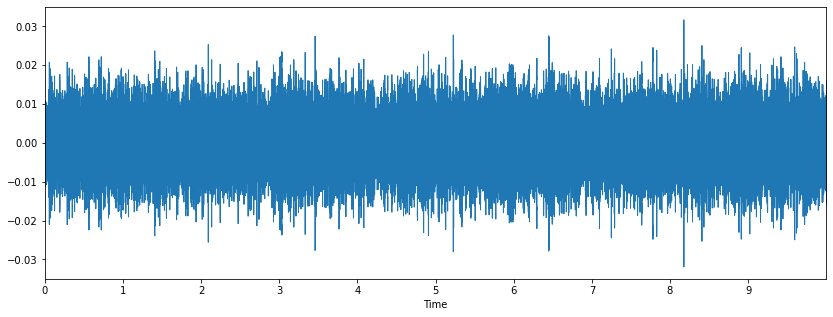

In [7]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

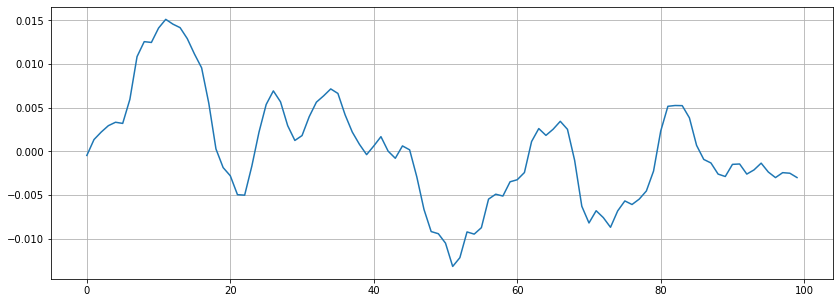

In [8]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [10]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

12


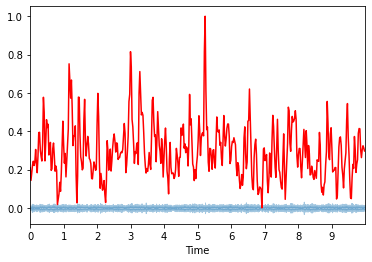

In [11]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

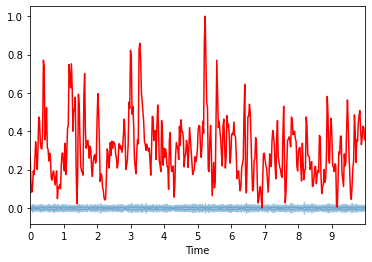

In [12]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 431)


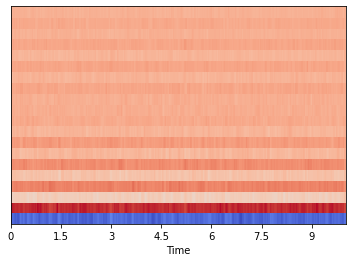

In [13]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

C:\Users\gulce\anaconda3\envs\mimii\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\gulce\anaconda3\envs\mimii\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\gulce\anaconda3\envs\mimii\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


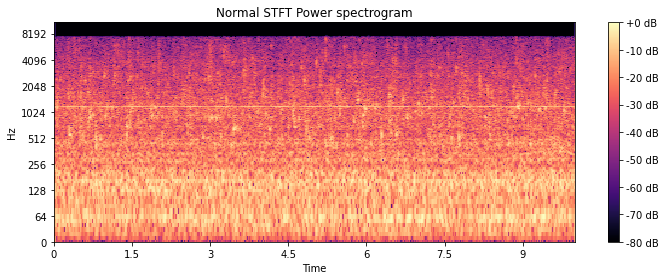

In [11]:
stft_spectrum_matrix = librosa.stft(x)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Normal STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [13]:
stft_spectrum_matrix

array([[ 8.1294721e-01+0.00000000e+00j,  4.2100930e-01+0.00000000e+00j,
         5.1782340e-02+0.00000000e+00j, ...,
         9.3595207e-02+0.00000000e+00j, -4.0733907e-03+0.00000000e+00j,
         3.7264803e-01+0.00000000e+00j],
       [-6.4914191e-01-5.33427469e-17j, -1.1415637e-01-3.85631144e-01j,
         1.2489058e-02+2.15624627e-02j, ...,
        -8.2055144e-02-1.49810286e-02j,  4.4636629e-03-1.03651203e-01j,
        -8.1991993e-02+4.95940834e-01j],
       [ 4.4922784e-01-1.37321635e-17j, -1.0969642e-01+1.56116009e-01j,
        -7.2307996e-02-2.12248042e-01j, ...,
        -4.5323838e-02+2.90447682e-01j,  3.4240577e-01+7.77677000e-02j,
        -5.4926521e-01-6.93176150e-01j],
       ...,
       [ 1.9737424e-03+5.92590785e-18j, -9.8684942e-04+3.47238327e-08j,
        -4.0614296e-08-3.78975606e-08j, ...,
         4.3955142e-09+2.68007239e-09j, -4.5954454e-05+8.22608999e-05j,
         5.0306605e-04-9.00844403e-04j],
       [-1.9737221e-03-7.37257477e-18j, -1.3038644e-08+9.86865838e-0